In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy.stats as stats
plt.rc('text', usetex=True)
plt.style.use('ggplot')

In [6]:
def plot_dist(dist, dist_name):
    m = dist.mean
    cov = dist.cov
    x = np.linspace(m[0] - 3*np.sqrt(cov[0,0]), m[0] + 3*np.sqrt(cov[0,0]), 100)
    y = np.linspace(m[1] - 3*np.sqrt(cov[1,1]), m[1] + 3*np.sqrt(cov[1,1]), 100)

    x, y = np.meshgrid(x, y)
    xy = np.stack((x,y), axis=2)
    z = dist.pdf(xy)

    plt.figure()
    plt.title('P(' + dist_name + ')')
    plt.contourf(x, y, z, cmap='Reds')
    plt.xlim(m[0] - 3*np.sqrt(cov[0,0]), m[0] + 3*np.sqrt(cov[0,0]))
    plt.ylim(m[1] - 3*np.sqrt(cov[1,1]), m[1] + 3*np.sqrt(cov[1,1]))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.colorbar()
    plt.show()

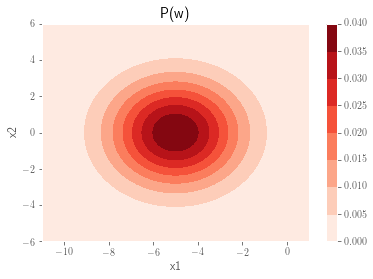

[-1.03150307  1.06552589]


In [7]:
# distribution of w

# create multivariate gaussian
m = np.array([-5, 0])
s_w = 2
cov = np.diag((s_w**2,s_w**2))
w_dist = stats.multivariate_normal(m, cov)

# plot dist
plot_dist(w_dist, 'w')

# draw a sample
w = w_dist.rvs()
print(w)

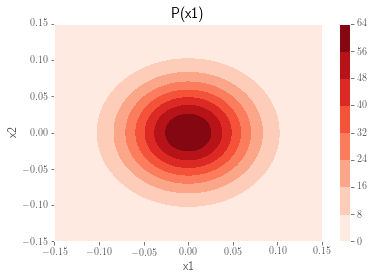

In [11]:
# distribution of x1

# create multivariate gaussian
m = np.array([0, 0])
s_w = 0.05
cov = np.diag((s_w**2,s_w**2))
x1_dist = stats.multivariate_normal(m, cov)

# plot dist
plot_dist(x1_dist, 'x1')

# draw a sample
nof_samples = 15
x1 = x1_dist.rvs(nof_samples)
# print(x1)

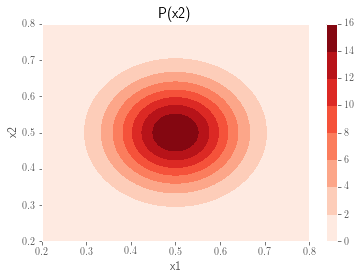

In [12]:
# distribution of x2

# create multivariate gaussian
m = np.array([0.5, 0.5])
s_w = 0.1
cov = np.diag((s_w**2,s_w**2))
x2_dist = stats.multivariate_normal(m, cov)

# plot dist
plot_dist(x2_dist, 'x2')

# draw a sample
nof_samples = 30
x2 = x2_dist.rvs(nof_samples)
# print(x2)

In [13]:
# distribution of y1
m = x1.dot(w)
s_y = 1
y1 = np.random.randn(m.shape[0])*s_y + m

# distribution of y2
m = x2.dot(w)
s_y = 1
y2 = np.random.randn(m.shape[0])*s_y + m

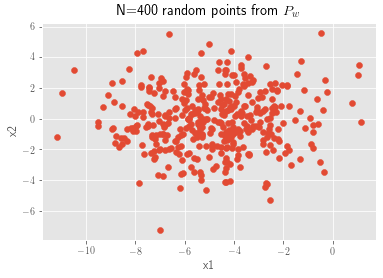

In [14]:
# scatter plot
tmp = w_dist.rvs(400)

plt.figure()
plt.title('N=400 random points from $P_w$')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(tmp[:,0], tmp[:,1])
plt.show()

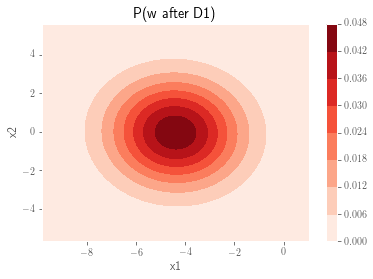

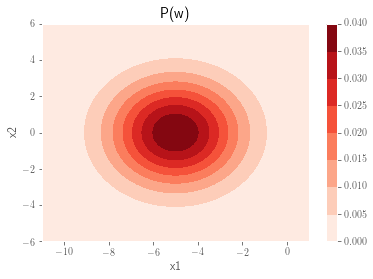

In [22]:
x1.shape
s_w = 2
v_0 = np.diag((s_w**2,s_w**2))
s_y = 1

def compute_Vn(x1, s_y, v_0):
    return s_y**2 * np.linalg.inv(s_y**2 * np.linalg.inv(v_0) + x1.T.dot(x1))

Vn = compute_Vn(x1, s_y, v_0)
w0 = np.array([[-5],[0]])

def compute_w_n(x1, s_y, v_0, V_n, w0, y1):
    return (Vn.dot(np.linalg.inv(v_0))).dot(w0) + (Vn.dot(x1.T)).dot(np.expand_dims(y1, axis = -1)) / s_y**2

Wn = compute_w_n(x1, s_y, v_0, Vn, w0, y1)

# distribution of w after D1

# create multivariate gaussian
w_dist_after_D1 = stats.multivariate_normal(np.squeeze(Wn), Vn)

# plot dist
plot_dist(w_dist_after_D1, 'w after D1')
plot_dist(w_dist, 'w')

# draw a sample
# w = w_dist.rvs()
# print(w)


(2, 2)


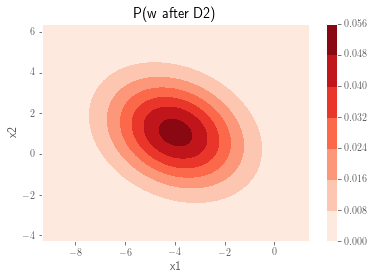

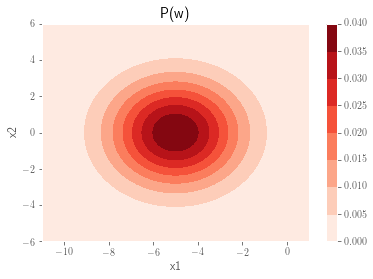

In [18]:
s_w = 2
v_0 = np.diag((s_w**2,s_w**2))
s_y = 1

def compute_Vn(x1, s_y, v_0):
    return s_y**2 * np.linalg.inv(s_y**2 * np.linalg.inv(v_0) + x1.T.dot(x1))

Vn = compute_Vn(x2, s_y, v_0)
print(Vn.shape)
w0 = np.array([[-5],[0]])

def compute_w_n(x1, s_y, v_0, V_n, w0, y1):
    return (Vn.dot(np.linalg.inv(v_0))).dot(w0) + (Vn.dot(x1.T)).dot(np.expand_dims(y1, axis = -1)) / s_y**2

Wn = compute_w_n(x2, s_y, v_0, Vn, w0, y2)

# distribution of w after D1

# create multivariate gaussian
w_dist_after_D2 = stats.multivariate_normal(np.squeeze(Wn), Vn)

# plot dist
plot_dist(w_dist_after_D2, 'w after D2')
plot_dist(w_dist, 'w')

# draw a sample
# w = w_dist.rvs()
# print(w)


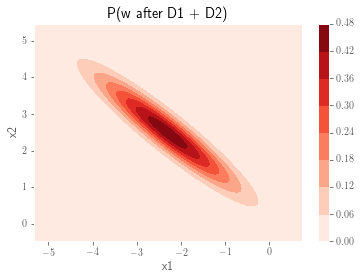

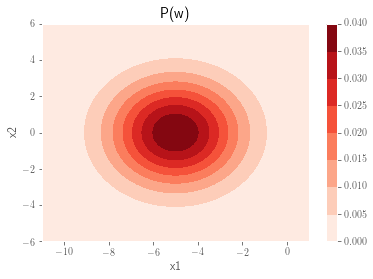

In [17]:
s_w = 2
v_0 = np.diag((s_w**2,s_w**2))
s_y = 1

def compute_Vn(x1, s_y, v_0):
    return s_y**2 * np.linalg.inv(s_y**2 * np.linalg.inv(v_0) + x1.T.dot(x1))

Vn = compute_Vn(np.concatenate((x1, x2), axis=0), s_y, v_0)
w0 = np.array([[-5],[0]])

def compute_w_n(x1, s_y, v_0, V_n, w0, y1):
    return (Vn.dot(np.linalg.inv(v_0))).dot(w0) + (Vn.dot(x1.T)).dot(np.expand_dims(y1, axis = -1)) / s_y**2

Wn = compute_w_n(np.concatenate((x1, x2), axis=0), s_y, v_0, Vn, w0, np.concatenate((y1, y2), axis=0))

# distribution of w after D1

# create multivariate gaussian
w_dist_after_D2 = stats.multivariate_normal(np.squeeze(Wn), Vn)

# plot dist
plot_dist(w_dist_after_D2, 'w after D1 + D2')
plot_dist(w_dist, 'w')

# draw a sample
# w = w_dist.rvs()
# print(w)
